In [252]:
import bz2
import pandas as pd

def load_amazon_sample(file_path, nrows=50000):
    texts = []
    labels = []
    with bz2.open(file_path, 'rt', encoding='utf-8', errors='ignore') as f:
        for i, line in enumerate(f):
            if i >= nrows:
                break
            label = 1 if '__label__2' in line else 0
            text = line.replace('__label__1', '').replace('__label__2', '').strip()
            texts.append(text)
            labels.append(label)
    return pd.DataFrame({'text': texts, 'label': labels})

# Replace with your actual path if different
file_path = 'train.ft.txt.bz2'
df = load_amazon_sample(file_path)

# Preview
df.head()


,text,label
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1


In [253]:
df.to_csv("amazon_sample.csv", index=False)

## Preprocessing

## Install and Import NLP Libraries

In [258]:
import re
import nltk
import string

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Eugene\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##  Define Cleaning Function

In [261]:
def clean_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize (split into words)
    tokens = text.split()
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    return " ".join(tokens)


##  Apply Cleaning to Sample Dataset (with Progress Bar)

In [264]:
from tqdm import tqdm
tqdm.pandas()  # enables .progress_apply()

df['clean_text'] = df['text'].progress_apply(clean_text)

100%|██████████| 50000/50000 [00:00<00:00, 58213.75it/s]


## Quick Sanity Check

In [267]:
df[['text', 'clean_text']].head(10)

,text,clean_text
0,Stuning even for the non-gamer: This sound tra...,stuning even nongamer sound track beautiful pa...
1,The best soundtrack ever to anything.: I'm rea...,best soundtrack ever anything im reading lot r...
2,Amazing!: This soundtrack is my favorite music...,amazing soundtrack favorite music time hands i...
3,Excellent Soundtrack: I truly like this soundt...,excellent soundtrack truly like soundtrack enj...
4,"Remember, Pull Your Jaw Off The Floor After He...",remember pull jaw floor hearing youve played g...
5,an absolute masterpiece: I am quite sure any o...,absolute masterpiece quite sure actually takin...
6,"Buyer beware: This is a self-published book, a...",buyer beware selfpublished book want know whyr...
7,Glorious story: I loved Whisper of the wicked ...,glorious story loved whisper wicked saints sto...
8,A FIVE STAR BOOK: I just finished reading Whis...,five star book finished reading whisper wicked...
9,Whispers of the Wicked Saints: This was a easy...,whispers wicked saints easy read book made wan...


## EDA

## Class Distribution

C:\Users\Eugene\AppData\Local\Temp\ipykernel_1472\4121910306.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='pastel')


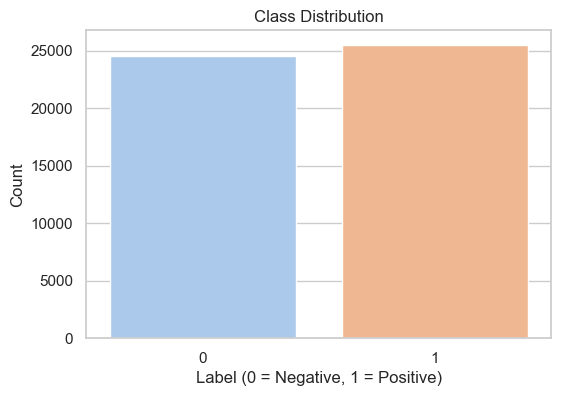

<Figure size 640x480 with 0 Axes>

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot label counts
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='pastel')
plt.title('Class Distribution')
plt.xlabel('Label (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()
plt.savefig("images/class_distribution.png")

##  Word Clouds

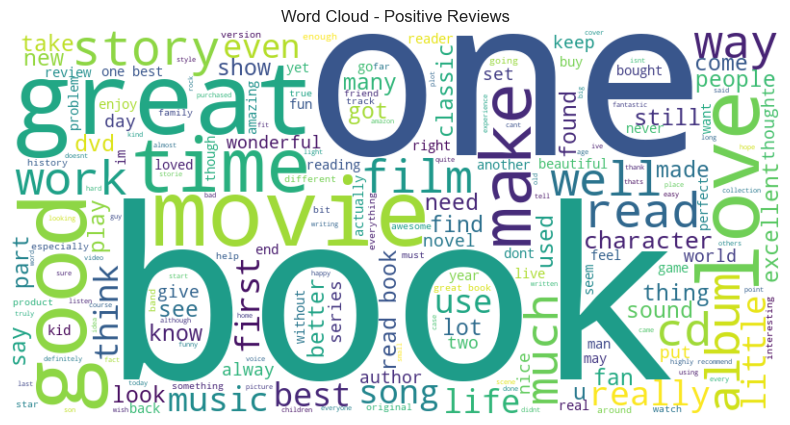

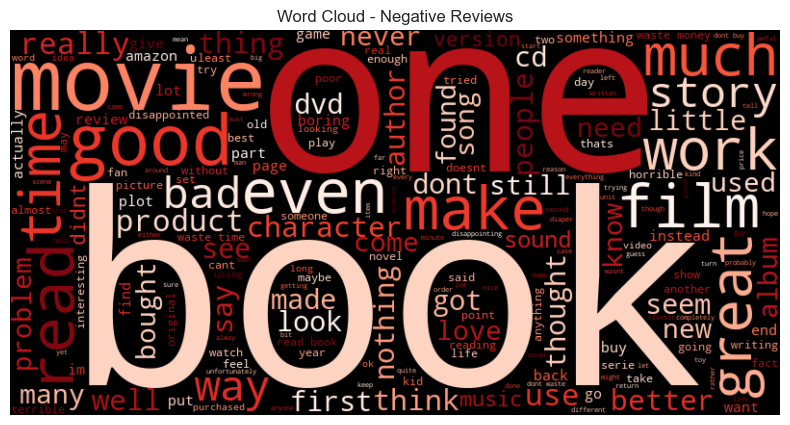

In [286]:
from wordcloud import WordCloud

# Split by class
pos_text = " ".join(df[df['label'] == 1]['clean_text'])
neg_text = " ".join(df[df['label'] == 0]['clean_text'])

# Positive
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Reviews')
plt.savefig("images/wordcloud_positive.png", bbox_inches='tight')
plt.show()

# Negative
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(neg_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Reviews')
plt.show()


## Most Frequent Words (Top 20)

C:\Users\Eugene\AppData\Local\Temp\ipykernel_1472\1481204244.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=pos_df, ax=axes[0], palette='Greens_d')
C:\Users\Eugene\AppData\Local\Temp\ipykernel_1472\1481204244.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=neg_df, ax=axes[1], palette='Reds_d')


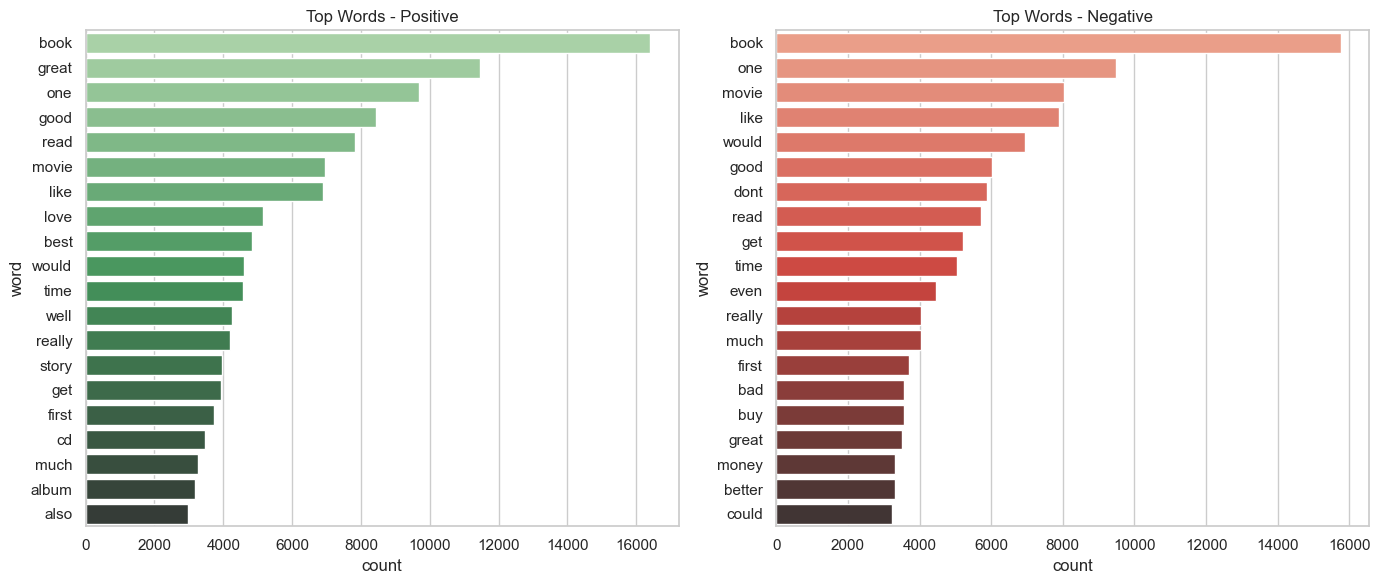

<Figure size 640x480 with 0 Axes>

In [26]:
from collections import Counter

def get_top_n_words(corpus, n=20):
    words = " ".join(corpus).split()
    return Counter(words).most_common(n)

# Get top 20 for each class
top_pos = get_top_n_words(df[df['label'] == 1]['clean_text'])
top_neg = get_top_n_words(df[df['label'] == 0]['clean_text'])

# Turn into DataFrames
pos_df = pd.DataFrame(top_pos, columns=['word', 'count'])
neg_df = pd.DataFrame(top_neg, columns=['word', 'count'])

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='count', y='word', data=pos_df, ax=axes[0], palette='Greens_d')
axes[0].set_title("Top Words - Positive")

sns.barplot(x='count', y='word', data=neg_df, ax=axes[1], palette='Reds_d')
axes[1].set_title("Top Words - Negative")
plt.tight_layout()
plt.show()
plt.savefig("images/frequent_words.png")

##  Optional: Review Length Distribution

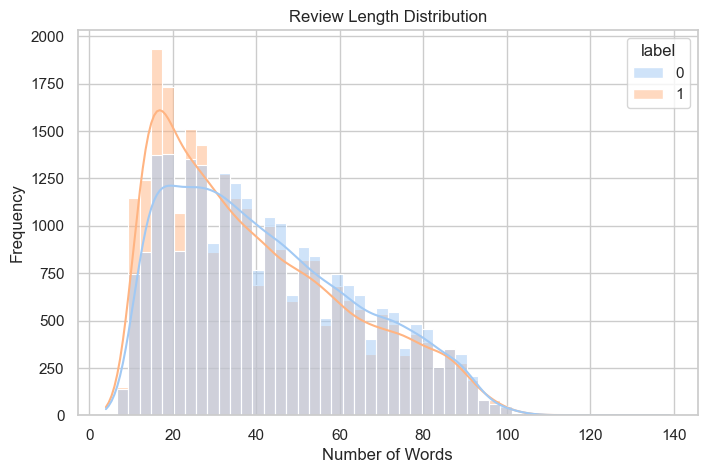

In [284]:
df['text_length'] = df['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True, palette='pastel')
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


## TF-IDF feature engineering

## Step 1: TF-IDF Vectorization

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # You can increase to 10,000+ if RAM allows

# Fit and transform the clean text
X = tfidf.fit_transform(df['clean_text'])

# Target variable
y = df['label']


## Step 2: Train/Test Split

In [88]:
from sklearn.model_selection import train_test_split

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Step 3: Logistic Regression Model

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create and train the model
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)


In [94]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8776

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4899
           1       0.88      0.88      0.88      5101

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



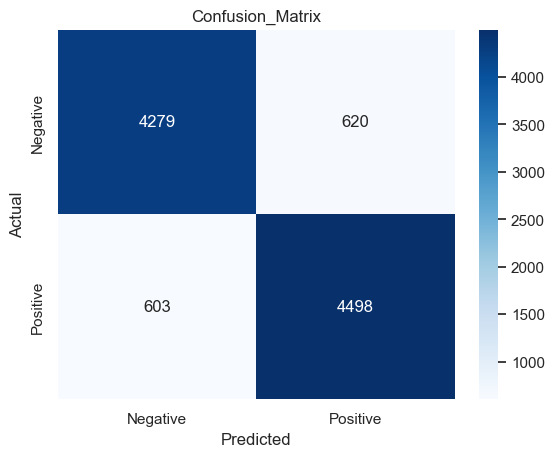

In [276]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion_Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("images/confusion_matrix_logistic_regression.png")
plt.show()


## Hyperparameter Tuning with GridSearchCV

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [101]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],        # Regularization strength
    'penalty': ['l2'],              # L2 regularization (L1 needs liblinear solver)
    'solver': ['lbfgs', 'saga'],    # solvers compatible with L2
    'max_iter': [200, 300]
}


In [103]:
# Create base model
lr = LogisticRegression()

In [105]:
# Grid Search
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid,
                           scoring='f1', cv=5, verbose=1, n_jobs=-1)

In [107]:
# Fit on training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [200, 300],
                         'penalty': ['l2'], 'solver': ['lbfgs', 'saga']},
             scoring='f1', verbose=1)

In [108]:
# Best model
best_lr = grid_search.best_estimator_

In [109]:
# Evaluate on test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = best_lr.predict(X_test)

In [110]:
# Print results
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 1, 'max_iter': 300, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.8777

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4899
           1       0.88      0.88      0.88      5101

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



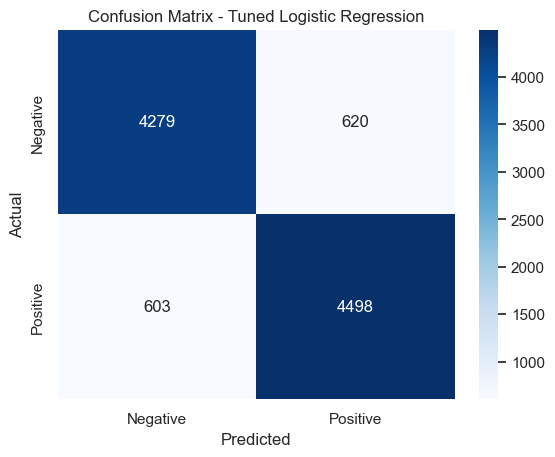

In [278]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("images/confusion_matrix_tuned_logistic_regression.png")
plt.show()


In [112]:
import joblib
joblib.dump(best_lr, 'logistic_regression_best_model.pkl')

['logistic_regression_best_model.pkl']

## LSTM and BERT model
two deep learning models for sentiment analysis

## Step 1: Preprocessing for LSTM

In [121]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [122]:
# Parameters
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 100

In [123]:
# Tokenize
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [124]:
# Train-test split
X_dl = padded_sequences
y_dl = df['label'].values
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_dl, y_dl, test_size=0.2, random_state=42)

## Step 2: Build and Train the LSTM Model

In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Build model
model_lstm = Sequential([
    Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
history_lstm = model_lstm.fit(X_train_dl, y_train_dl, validation_split=0.2, epochs=5, batch_size=64)


Epoch 1/5


C:\Users\Eugene\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 46s 87ms/step - accuracy: 0.5415 - loss: 0.6871 - val_accuracy: 0.6050 - val_loss: 0.6437
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 57s 113ms/step - accuracy: 0.7305 - loss: 0.5503 - val_accuracy: 0.7832 - val_loss: 0.4662
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 55s 109ms/step - accuracy: 0.8504 - loss: 0.3648 - val_accuracy: 0.8748 - val_loss: 0.2935
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 53s 105ms/step - accuracy: 0.9184 - loss: 0.2196 - val_accuracy: 0.8788 - val_loss: 0.2857
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 48s 96ms/step - accuracy: 0.9411 - loss: 0.1646 - val_accuracy: 0.8823 - val_loss: 0.3140


##  Step 3: Evaluate LSTM

In [144]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [145]:
# Predictions
y_pred_dl = (model_lstm.predict(X_test_dl) > 0.5).astype("int32")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step


In [146]:
# Metrics
print(classification_report(y_test_dl, y_pred_dl))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4955
           1       0.88      0.87      0.88      5045

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [154]:
print(type(model_lstm))

<class 'keras.src.models.sequential.Sequential'>


# Save trained LSTM model

In [158]:
import os

# Create 'models' directory if it doesn't exist
os.makedirs("models", exist_ok=True)
model_lstm.save("models/best_lstm_model.keras")

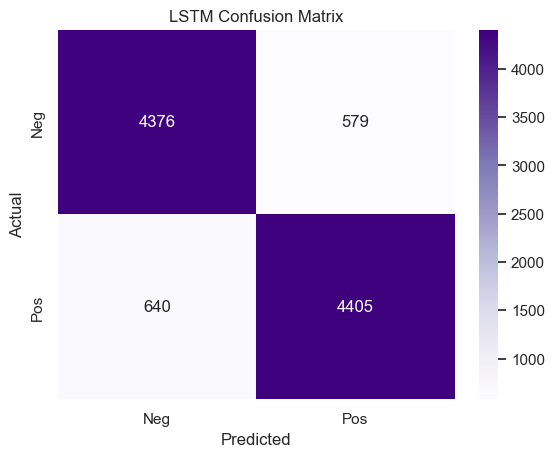

In [280]:
# Confusion Matrix
cm_dl = confusion_matrix(y_test_dl, y_pred_dl)
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Purples', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
plt.title("LSTM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("images/lstm_confusion_matrix.png")
plt.show()


 ## BERT Sentiment Classifier

In [179]:
from torch.optim import AdamW

In [181]:
from transformers import get_scheduler

In [183]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load tokenizer and model (binary classification → num_labels=2)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [184]:
from torch.optim import AdamW  # ✅ correct

optimizer = AdamW(model.parameters(), lr=2e-5)


In [185]:
optimizer = AdamW(model.parameters(), lr=2e-5)

## Step 2: Tokenize with BERT Tokenizer

In [187]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [188]:
import torch

# Choose GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from transformers import BertTokenizer, BertForSequenceClassification
# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [189]:
import bz2
import pandas as pd

def load_amazon_sample(file_path, nrows=50000):
    texts = []
    labels = []
    with bz2.open(file_path, 'rt', encoding='utf-8', errors='ignore') as f:
        for i, line in enumerate(f):
            if i >= nrows:
                break
            label = 1 if '__label__2' in line else 0
            text = line.replace('__label__1', '').replace('__label__2', '').strip()
            texts.append(text)
            labels.append(label)
    return pd.DataFrame({'text': texts, 'label': labels})

# Replace with your actual path if different
file_path = 'train.ft.txt.bz2'
df = load_amazon_sample(file_path)

In [190]:
sample_df = df.sample(n=5000, random_state=42)

In [195]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Reduce dataset size for fast training (e.g., 5000 samples)
sample_df = df.sample(n=5000, random_state=42)
texts = sample_df['text'].tolist()
labels = sample_df['label'].tolist()

# Tokenize the text
inputs = tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors="pt")
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']
import torch
labels = torch.tensor(labels)

In [197]:
# Convert labels to integers if not already (e.g., "__label__1" → 0, "__label__2" → 1)
df['label'] = df['label'].apply(lambda x: 0 if x == '__label__1' else 1)

# Tokenize all texts
encodings = tokenizer(list(df['text']), truncation=True, padding=True, max_length=128)
labels = list(df['label'])

## Create a Custom Dataset Class

In [201]:
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx]),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx]),
            'labels': torch.tensor(self.labels[idx])
        }

    def __len__(self):
        return len(self.labels)

# Create dataset and split
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(df['text'], df['label'], test_size=0.2, stratify=df['label'])

train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=128)

train_dataset = ReviewDataset(train_encodings, list(train_labels))
val_dataset = ReviewDataset(val_encodings, list(val_labels))


In [212]:
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels.values)  # or labels.tolist()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)



In [214]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)


## Load BERT Model & Optimizer

In [217]:
from transformers import BertForSequenceClassification, get_scheduler
from torch.optim import AdamW
optimizer = AdamW(model.parameters(), lr=2e-5)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 3

# Learning rate scheduler
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=len(train_loader) * num_epochs
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Training Loop

In [33]:
from tqdm import tqdm

model.train()

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch + 1}/{num_epochs}")
    loop = tqdm(train_loader, leave=True)
    total_loss = 0

    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}

        outputs = model(**batch)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item())

    avg_loss = total_loss / len(train_loader)
    print(f"Average training loss: {avg_loss:.4f}")



Epoch 1/3


Epoch 1: 100%|██████████| 2500/2500 [7:09:01<00:00, 10.30s/it, loss=1.91e-5]     


Average training loss: 0.0024

Epoch 2/3


Epoch 2: 100%|██████████| 2500/2500 [43:40:47<00:00, 62.90s/it, loss=6.5e-6]         


Average training loss: 0.0000

Epoch 3/3


Epoch 3: 100%|██████████| 2500/2500 [18:44:40<00:00, 26.99s/it, loss=4.28e-6]      

Average training loss: 0.0000


 ## Step-by-Step Evaluation

## 1. Generate Predictions on Test Set
Ensure the model is in evaluation mode and make predictions:

## Reload the Dataset

In [221]:
import bz2
import pandas as pd

def load_amazon_sample(file_path, nrows=50000):
    texts = []
    labels = []
    with bz2.open(file_path, 'rt', encoding='utf-8', errors='ignore') as f:
        for i, line in enumerate(f):
            if i >= nrows:
                break
            label = 1 if '__label__2' in line else 0
            text = line.replace('__label__1', '').replace('__label__2', '').strip()
            texts.append(text)
            labels.append(label)
    return pd.DataFrame({'text': texts, 'label': labels})

# Load the sample
file_path = 'train.ft.txt.bz2'  # Adjust if needed
sample_df = load_amazon_sample(file_path)


## Re-split and Tokenize Your Dataset

In [223]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
import torch

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# If you still have sample_df from earlier:
train_texts, test_texts, train_labels, test_labels = train_test_split(
    sample_df['text'], sample_df['label'], test_size=0.2, random_state=42
)

# Tokenize
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=128)


## Create Dataset and DataLoader

In [226]:
from torch.utils.data import Dataset, DataLoader

class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx]),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx]),
            'labels': torch.tensor(self.labels[idx])
        }

    def __len__(self):
        return len(self.labels)

# Create test dataset and dataloader
test_dataset = SentimentDataset(test_encodings, test_labels.tolist())
test_dataloader = DataLoader(test_dataset, batch_size=16)


## Evaluate the Model

In [228]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

model.eval()
all_preds = []
all_labels = []

for batch in test_dataloader:
    batch = {k: v.to(model.device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1)
    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(batch['labels'].cpu().numpy())

# Evaluation
print(classification_report(all_labels, all_preds, digits=4))
print(confusion_matrix(all_labels, all_preds))


              precision    recall  f1-score   support

           0     0.4930    0.9808    0.6561      4955
           1     0.3262    0.0091    0.0177      5045

    accuracy                         0.4906     10000
   macro avg     0.4096    0.4950    0.3369     10000
weighted avg     0.4088    0.4906    0.3341     10000

[[4860   95]
 [4999   46]]


In [239]:
torch.save(model.state_dict(), "models/best_bert_model.pt")

## Visualize Confusion Matrix with Heatmap

Classification Report:
              precision    recall  f1-score   support

    Negative       0.49      0.98      0.66      4955
    Positive       0.33      0.01      0.02      5045

    accuracy                           0.49     10000
   macro avg       0.41      0.49      0.34     10000
weighted avg       0.41      0.49      0.33     10000



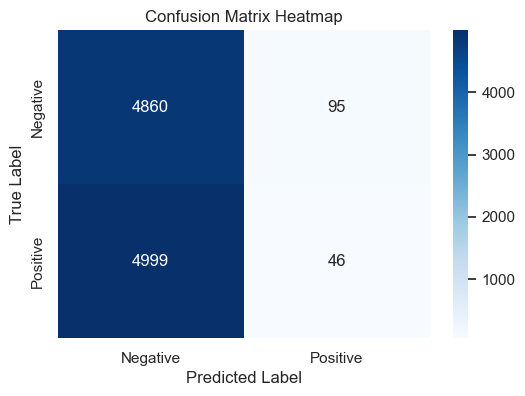

In [282]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=["Negative", "Positive"]))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.savefig("images/bert_model_confusion_matrix_heatmap.png")
plt.show()



## Save heatmap as image:

In [46]:
plt.savefig("confusion_matrix_heatmap.png")

<Figure size 640x480 with 0 Axes>

 ## Save classification_report to text:

In [242]:
with open("classification_report.txt", "w") as f:
    f.write(classification_report(all_labels, all_preds, target_names=["Negative", "Positive"]))